<a href="https://www.kaggle.com/code/victorfsc/california-housing-end-to-end?scriptVersionId=160279354" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Also check out a dashboard I made on tableau:

https://public.tableau.com/app/profile/victor.foscarini.almeida3130/viz/california_housing_16351188075760/Dashboard1

In [1]:
%%HTML
<div class='tableauPlaceholder' id='viz1638280355335' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;california_housing_16351188075760&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='california_housing_16351188075760&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ca&#47;california_housing_16351188075760&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='pt-BR' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1638280355335');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1677px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# 1 - Loading libraries and data

In [2]:
#basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#visualizing missing values
import missingno as msno

#machine learning
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("../input/california-housing-prices/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# 2 - Exploratory data analysis

## About data: we must be aware of this 2 points to fix them
- Only ocean_proximity is object, the rest is float
- Missing values of total_bedrooms


In [4]:
#basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<AxesSubplot:>

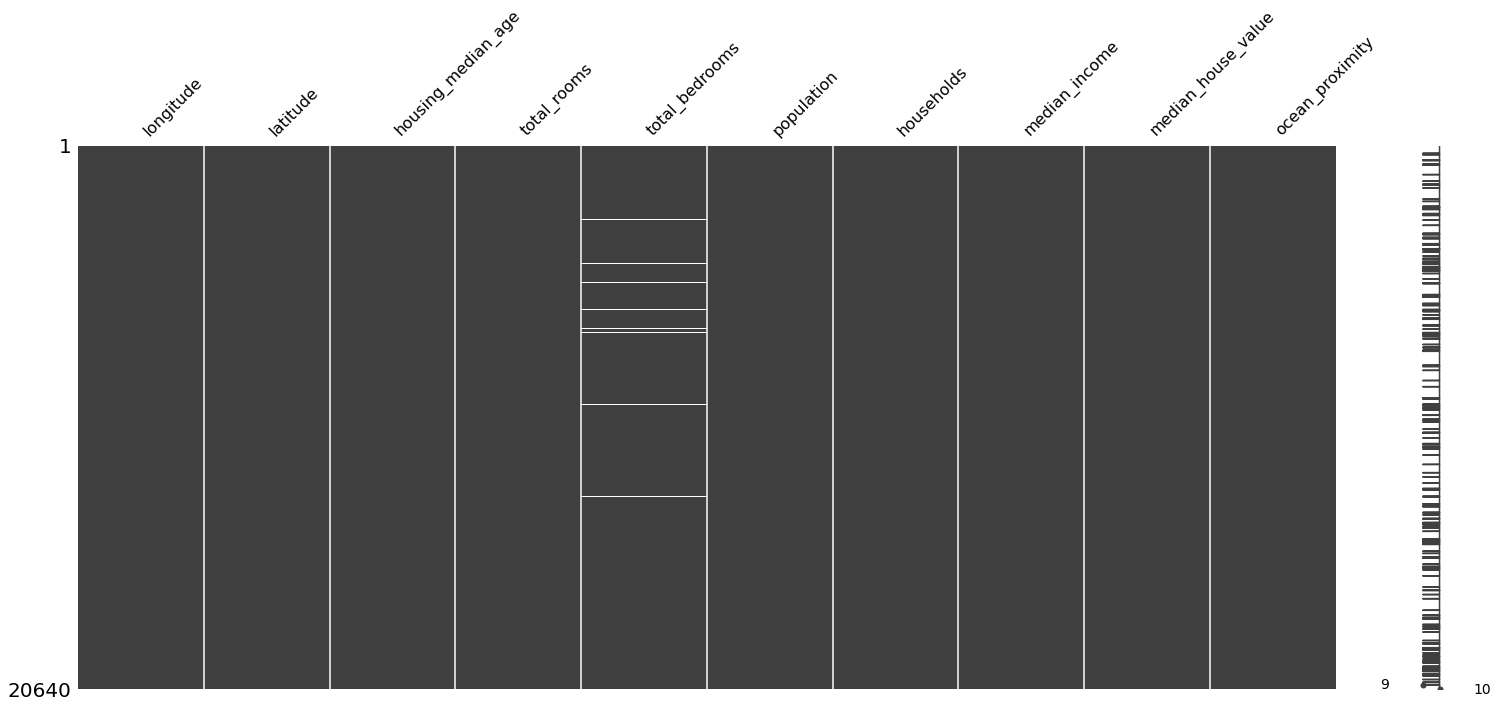

In [5]:
#check missing values
msno.matrix(df)

In [6]:
#percentage of missing values
df.isnull().sum()/df.shape[0]

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

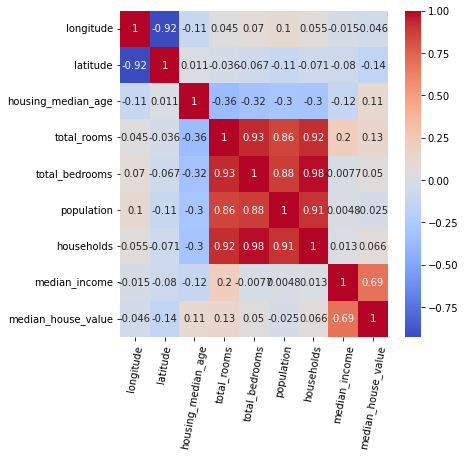

In [7]:
#correlation matrix to get initial idea of which columns are more correlated
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.xticks(rotation=80)
plt.show()

## See distribution of values: numerical

- There's a weird peak on the end of housing_median_age and median_house_values

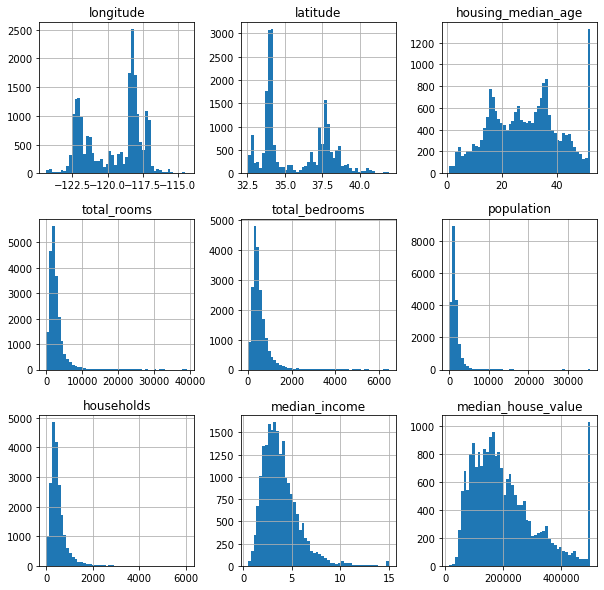

In [8]:
#histograms for numerical columns
df.hist(bins=50, figsize=(10,10))
plt.show()

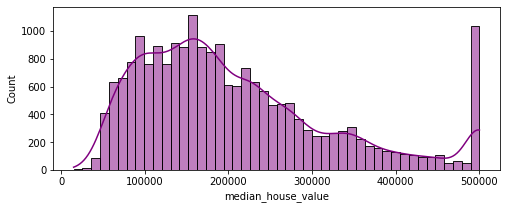

In [9]:
#the one we want to predict: median_house_value
plt.figure(figsize=(8,3))
sns.histplot(x='median_house_value',data=df,kde=True,color='purple')
plt.show()

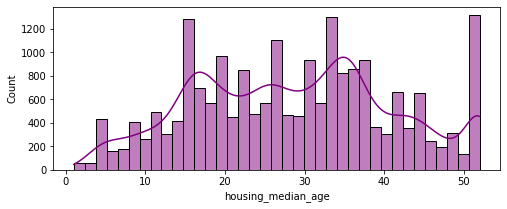

In [10]:
#housing_median_age also has a weird peak
plt.figure(figsize=(8,3))
sns.histplot(x='housing_median_age', data=df, kde=True, color='purple')
plt.show()

Here I noticed that usind df.hist or sns.histplot gave different aspects at the end of housing_median_age (probalby due to bin number), so it's interesting to look at it with different bins and into the data itself.

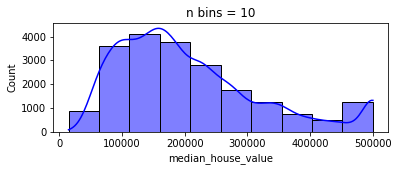

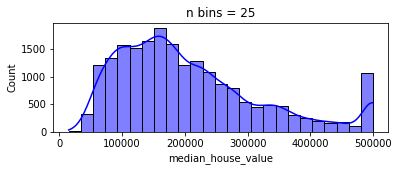

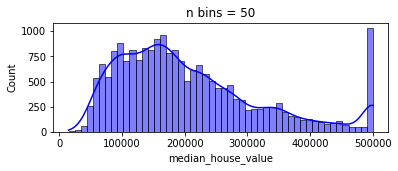

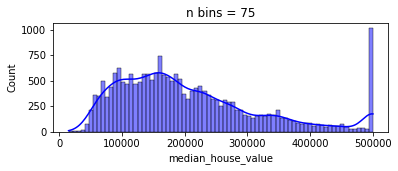

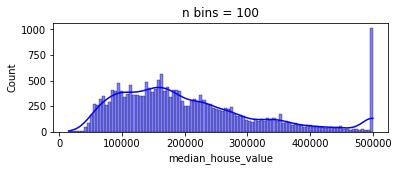

In [11]:
#median_house_value peak examination
for bins in [10,25,50,75,100]:
  plt.figure(figsize=(6,2))
  sns.histplot(x='median_house_value', data=df, kde=True, color='blue', bins=bins)
  plt.title('n bins = {}'.format(bins))
  plt.show()

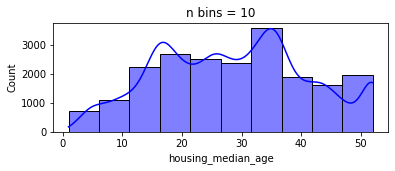

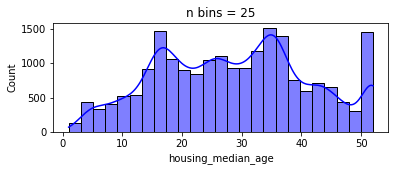

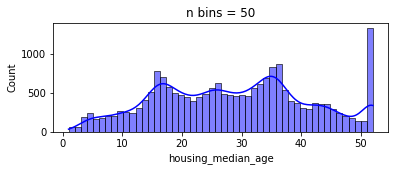

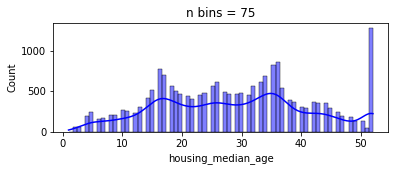

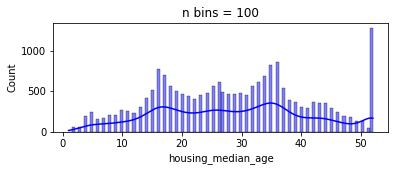

In [12]:
#housing_median_age peak examination
for bins in [10,25,50,75,100]:
  plt.figure(figsize=(6,2))
  sns.histplot(x='housing_median_age', data=df, kde=True, color='blue', bins=bins)
  plt.title('n bins = {}'.format(bins))
  plt.show()

Plotting median_house_value and housing_median_age with a jointplot we see that they're not really very correlated

<Figure size 576x216 with 0 Axes>

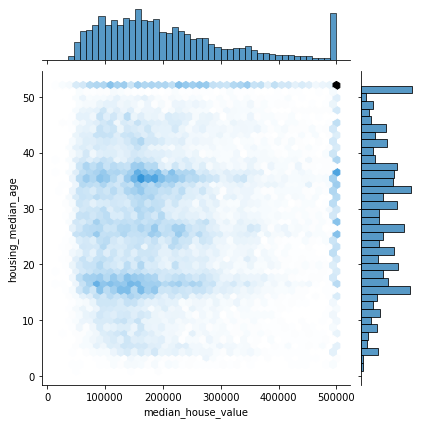

In [13]:
#scatter with marginal point (jointplot)
plt.figure(figsize=(8,3))
sns.jointplot(x="median_house_value", y="housing_median_age", data=df, kind='hex')
plt.show()

Checking values on dataframe

In [14]:
#check median_house_value most common values
df.median_house_value.value_counts().head(5)

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
Name: median_house_value, dtype: int64

In [15]:
#check housing_median_age most common values
df.housing_median_age.value_counts().head(5)

52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
Name: housing_median_age, dtype: int64

## See distribution of values: categorical

- There are too few ISLAND items
- Houses INLAND seem to be cheaper than the rest
- Important: ocean_proximity values seem to have two similar types distribution: one for <1H OCEAN and INLAND, other for NEAR BAY and NEAR OCEAN. However, <1H OCEAN an INLAND aren't similar enogh to join (as seen on mean, median and std here), while NEAR BAY and NEAR OCEAN are similar enough.
- Therefore, it seems valid to create an ordered categorical column with 1 ad INLAND, 2 as <1H OCEAN and 3 as NEAR BAY aor NEAR OCEAN.

In [16]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

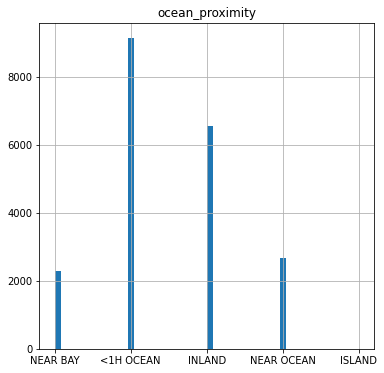

In [17]:
#histogram of columns for ocean_proximity
df['ocean_proximity'].hist(bins=50,figsize=(6,6))
plt.title('ocean_proximity')
plt.show()

In [18]:
df.groupby('ocean_proximity').mean()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,-119.732990,36.731829,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.260694,37.801057,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,-119.332555,34.738439,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


In [19]:
df.groupby('ocean_proximity').median()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.275,34.03,30.0,2108.0,438.0,1247.0,421.0,3.87500,214850.0
INLAND,-120.000,36.97,23.0,2131.0,423.0,1124.0,385.0,2.98770,108500.0
ISLAND,-118.320,33.34,52.0,1675.0,512.0,733.0,288.0,2.73610,414700.0
NEAR BAY,-122.250,37.79,39.0,2083.0,423.0,1033.5,406.0,3.81865,233800.0
NEAR OCEAN,-118.260,33.79,29.0,2195.0,464.0,1136.5,429.0,3.64705,229450.0


In [20]:
df.groupby('ocean_proximity').std()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,1.588888,1.467127,11.644453,2160.463696,427.911417,1185.848357,392.280718,2.001223,106124.292213
INLAND,1.900950,2.116073,12.018020,2385.831111,446.117778,1168.670126,392.252095,1.437465,70007.908494
ISLAND,0.070569,0.040866,13.164346,707.545264,169.320111,301.691067,113.200265,0.444180,80559.561816
NEAR BAY,0.147004,0.185434,13.070385,1830.817022,367.887605,885.899035,350.598369,2.017427,122818.537064
NEAR OCEAN,2.327307,2.275386,11.840371,1990.724760,376.320045,1005.563166,344.445256,2.010558,122477.145927


<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

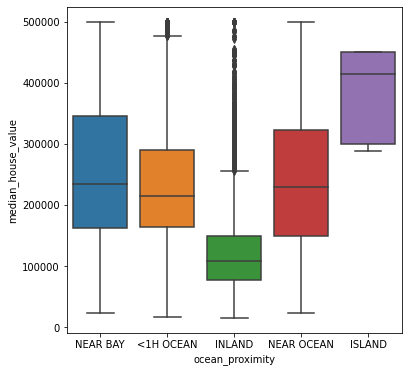

In [21]:
#ocean_proximity by median_house_value
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x="ocean_proximity", y="median_house_value")

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

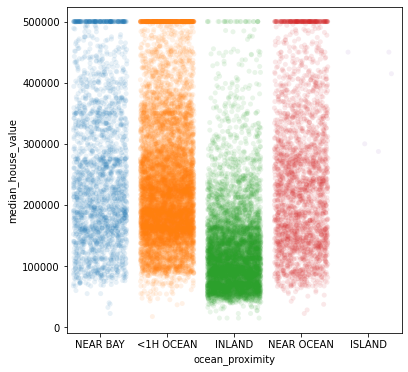

In [22]:
#ocean_proximity by median_house_value
plt.figure(figsize=(6,6))
sns.stripplot(data=df,x='ocean_proximity',y='median_house_value',jitter=0.4,alpha=0.1)

In [23]:
#one hot encoding for better visualization
one_hot = pd.get_dummies(df.ocean_proximity)
df = df.drop('ocean_proximity',axis=1)
df = df.join(one_hot)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


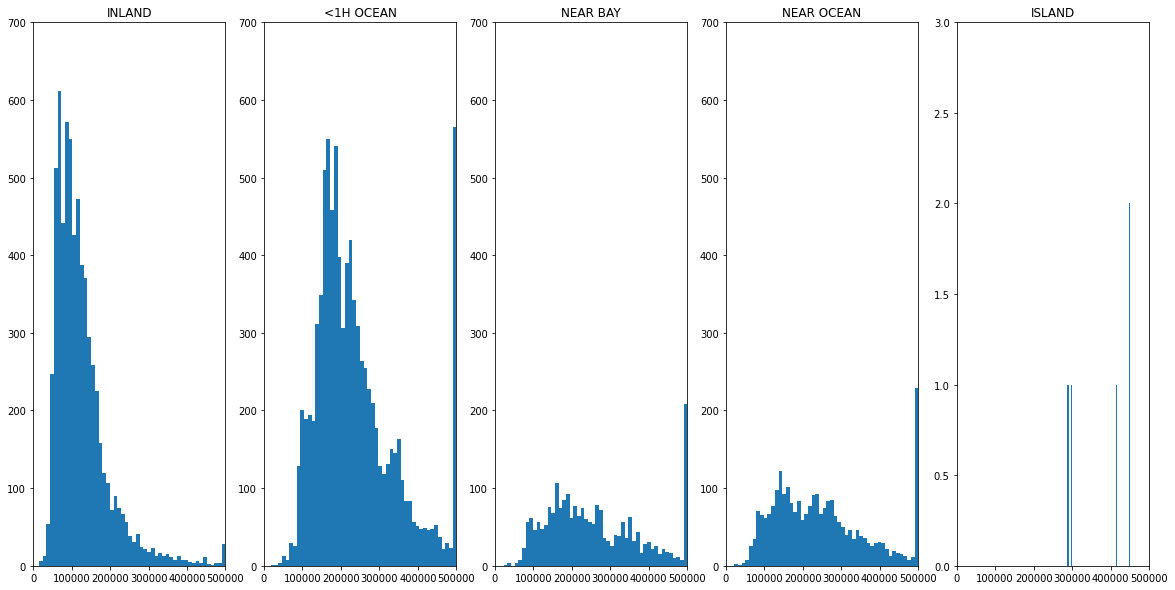

In [24]:
#see median_house_value distribution by location
fig, ax = plt.subplots(1,5,figsize=(20,10))
i=0
for loc in ['INLAND', '<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND']:
    ax[i].hist(df[df[loc]==1.0]['median_house_value'],bins=50,alpha=1)
    ax[i].set_title(loc)
    ax[i].set_xlim([0,500000])
    ax[i].set_ylim([0,700])
    if i==4:
        ax[i].set_ylim([0,3])
    i+=1
plt.show()

## See relation between columns and correlation matrix: ocean_prox divided

- total_bedrooms is extremely correlated positively with households (0.98)
- total_rooms, total_bedrooms, population and households are very correlated + with each other and housing_median_age has some - correlation with them
- maybe it'd be a good idea to delete total_bedrooms then or simply fill with median values
- median_income is the only one very correlated (+) with median_house_value
- Proximity to the ocean/bay is related to median_house_price, as expected. Note that, as seen before, categoricals are imbalanced
- obs: Pearson correlation is default

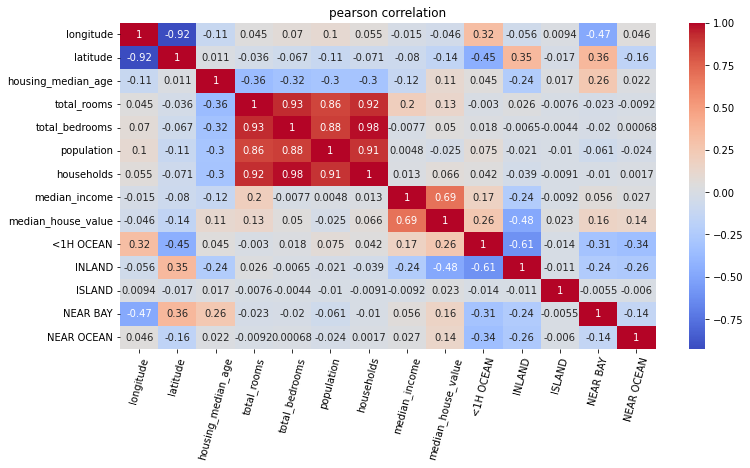

In [25]:
#pearson correlation matrix
from scipy import stats
df_corr = df.corr(method='pearson')
plt.figure(figsize=(12,6))
sns.heatmap(df_corr,cmap='coolwarm',annot=True)
plt.xticks(rotation=75)
plt.title('pearson correlation')
plt.show()

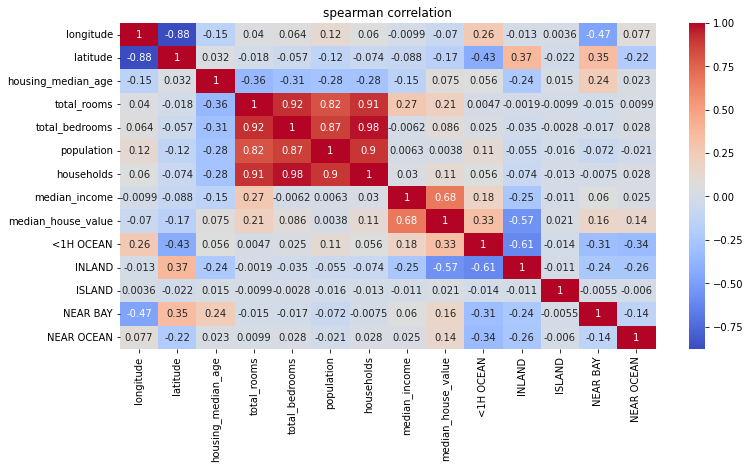

In [26]:
#spearman correlation matrix
df_corr = df.corr(method='spearman')
plt.figure(figsize=(12,6))
sns.heatmap(df_corr,cmap='coolwarm',annot=True)
plt.title('spearman correlation')
plt.show()

# 3 - Feature Engineering

## See relation between columns and correlation matrix: ocean_prox joined

- Joining ocean_prox according as described previously.
- Proximity to the ocean/bay is correlated positively to median_house_value, house_median_age and median_income


In [27]:
#we see a pattern on median_house_value distribution by location
#we join this 5 categories in a new NEAR WATER category

def f(row):
    if row['INLAND']:
      return 0
    if row['<1H OCEAN']:
      return 1
    if row['NEAR BAY'] or row[ 'NEAR OCEAN']:
      return 2
    else:
        return 0
df['water_proximity'] = df.apply(f,axis=1)
df = df.drop(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND'],axis=1)

In [28]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,water_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0


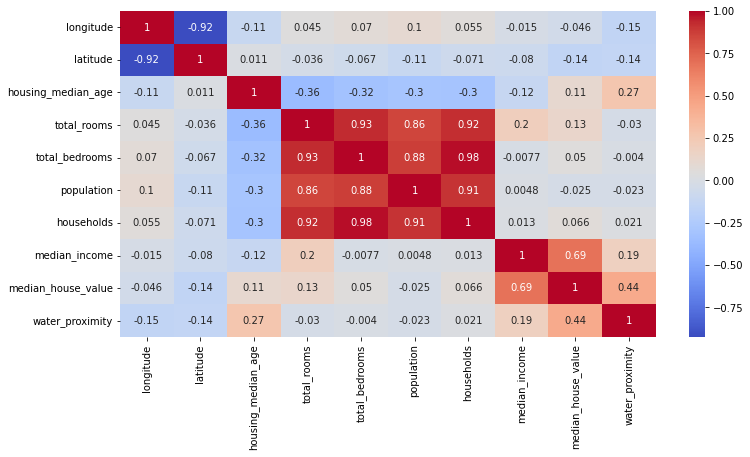

In [29]:
#correlation matrix
df_corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(df_corr,cmap='coolwarm',annot=True)
plt.show()

## Analyse features that seem more important
- The only feature where we can see a direct relation is median_income and median_house_value
- But, if we look at the distribution of the values of each column, we can see more relationships

In [30]:
#sorted correlation values
df_corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
water_proximity       0.435260
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

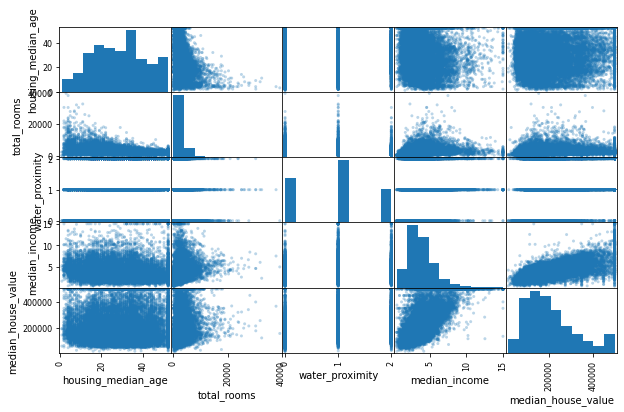

In [31]:
#histogram of columns that seem more important
atributes= [ 'housing_median_age', 'total_rooms','water_proximity','median_income','median_house_value']
matr = pd.plotting.scatter_matrix(df[atributes],figsize=(10,6),alpha=0.3)    

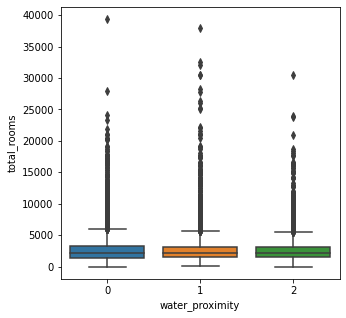

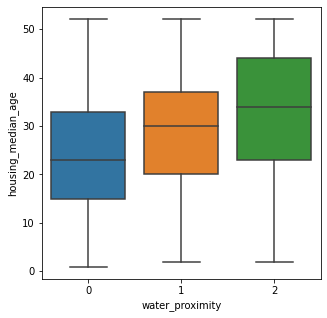

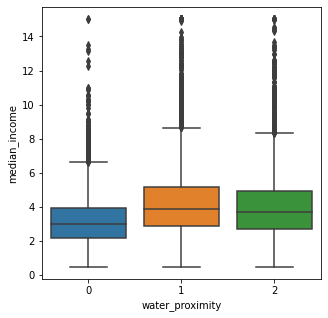

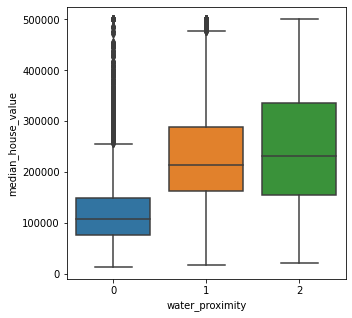

In [32]:
#relation with ocean_proximity
atributes= ['total_rooms','housing_median_age','median_income','median_house_value']
for atribute in atributes:
    plt.figure(figsize=(5,5))
    sns.boxplot(data=df, x='water_proximity', y=atribute)
    plt.show()

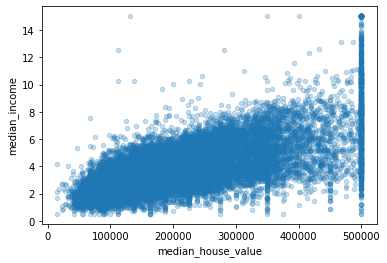

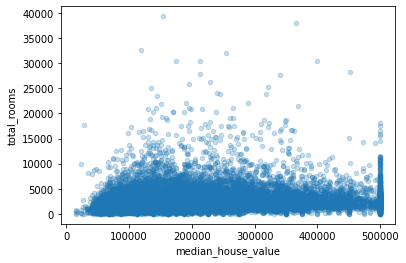

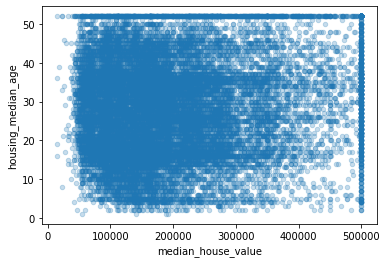

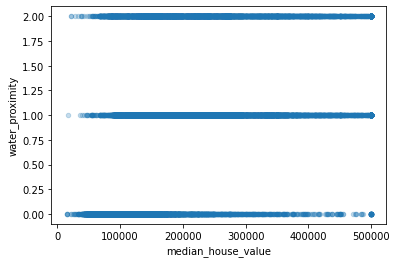

In [33]:
#relation with median_house_value
atributes= ['median_income','total_rooms','housing_median_age','water_proximity']
for atribute in atributes:
    df.plot(kind='scatter',x='median_house_value',y=atribute,alpha=0.25)

## Location: latitude and longitude
- Looks like the map of california
- There are clearly more expensive houses close to the ocean
- Metropolitan regions of San Francisco and Los Angeles are where most expensive houses are located.
- Can't think of a way to improve or make a better analysis of the meaning of locations, maybe the ML algorithm deal with it
- I can't find a trivial meaning of having high/small latitude and longitude, but they may help the algorithm considering that some regions are clearly more expensive, but it's not a linear relationship, it would be a more complicated function (a tree-based algorithm or support vector machine, for example, could do the job by selection a range of latitude and longitude where houses are more likely to be expensive)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

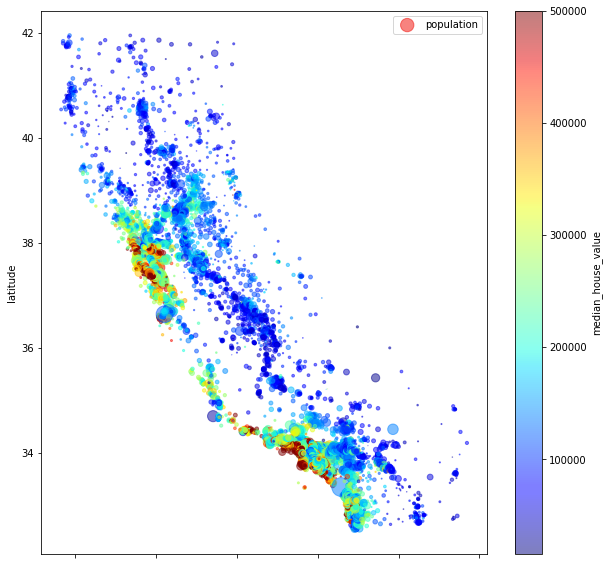

In [34]:
#visualizing geographical data with radius of circle s proportional to population and color c represents price
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.5,figsize=(10,10),
             s=df['population']/100,label='population',
             c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)

## To end feature engineering: dealing with total_bedrooms
- Since only a few values from total_bedrooms have missing values and it's very correlated with other attributes, we simply replace null values by the median


In [35]:
#fill total_bedrooms with median
df.fillna(df.median(),inplace=True)

# 4 - Machine Learning

## Create Model: Support Vector Machine
After doing hyperparameter optimization with different libraries as shown in [this notebook](https://www.kaggle.com/pavansanagapati/automated-hyperparameter-tuning), I obtained the following parameters that fit well:
- Hyperopt: {'C': 98444.24602802457, 'gamma': 0.33196206472681455, 'kernel': 1}
- TPOTClassifier: {'C' : 96600.0, 'gamma' : 0.8560715796670523, 'kernel':'rbf'}
- Optuna: {'C': 99448.59278046171, 'kernel': 'rbf', 'gamma': 0.34392791061008}

For more info, check  out the complete project on my [Github](https://github.com/Victor-Foscarini/Kaggle_Projects/tree/main/california_housing). Here I tested this combinations of hyperparameters and select the best one. The Optuna method was better.

In [36]:
parameter_models = [
    {'C': 98444.24602802457, 'gamma': 0.33196206472681455, 'kernel': 'rbf'},
    {'C' : 96600.0, 'gamma' : 0.8560715796670523, 'kernel':'rbf'},
    {'C': 99448.59278046171, 'kernel': 'rbf', 'gamma': 0.34392791061008}
]

In [37]:
#split in train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop('median_house_value', axis=1),df.median_house_value, test_size=0.25)

In [38]:
#apply standard scaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
for params in parameter_models:
  print(params)
  model = SVR(**params)
  model.fit(X_train, y_train)
  acc_train = model.score(X_train, y_train)
  acc_test = model.score(X_test, y_test)
  print("Accuracy Train: %s" % acc_train)
  print("Accuracy Test: %s" % acc_test)
  print('\n')

{'C': 98444.24602802457, 'gamma': 0.33196206472681455, 'kernel': 'rbf'}
Accuracy Train: 0.8013539735705967
Accuracy Test: 0.7792290110837395


{'C': 96600.0, 'gamma': 0.8560715796670523, 'kernel': 'rbf'}
Accuracy Train: 0.830132834305659
Accuracy Test: 0.7742848933150592


{'C': 99448.59278046171, 'kernel': 'rbf', 'gamma': 0.34392791061008}
Accuracy Train: 0.8025915491423691
Accuracy Test: 0.7798046162355696




I found that Optuna gave the best hyperparameters after optimizing the Support Vector Machine model as seen by the accuracy in the test data.